## Requirements for K means clustering 
1. Scale your variables
2. Use scatter plot to find the centroids to use for the K parameter Value
3. Used for unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [15]:
irisData = datasets.load_iris()
x = scale(irisData.data)
y = pd.DataFrame(irisData.target)
variableName = irisData.feature_names
print(variableName)
#print(y)
#print(irisData.describe())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print(irisData)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [13]:
print(x[0:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [14]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K Means clustering')

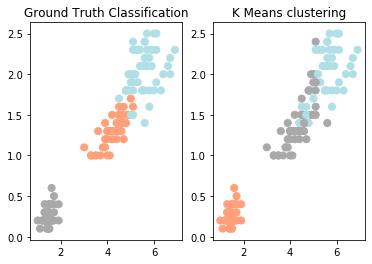

In [17]:
irisDataFrame = pd.DataFrame(irisData.data)
irisDataFrame.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Target']
color_theme = np.array(['darkgrey','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=irisDataFrame.Petal_Length,y=irisDataFrame.Petal_Width,c=color_theme[irisData.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=irisDataFrame.Petal_Length,y=irisDataFrame.Petal_Width,c=color_theme[clustering.labels_], s=50)
plt.title('K Means clustering')

Text(0.5, 1.0, 'K Means clustering')

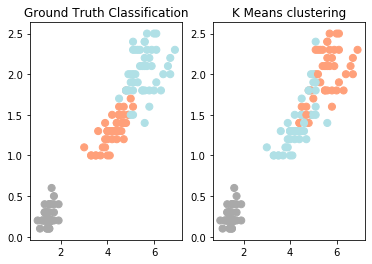

In [18]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=irisDataFrame.Petal_Length,y=irisDataFrame.Petal_Width,c=color_theme[irisData.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=irisDataFrame.Petal_Length,y=irisDataFrame.Petal_Width,c=color_theme[relabel], s=50)
plt.title('K Means clustering')

In [19]:
print(classification_report(y,relabel))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150

